In [32]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

iris = pd.read_csv('iris.data', names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'label'])
le = LabelEncoder()
iris['label'] = le.fit_transform(iris['label'])
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [33]:
breast_cancer = pd.read_csv('breast-cancer-wisconsin.data', names=['id', 'clump_thickness', 'uniformity_of_cell_size', 'uniformity_of_cell_shape', 'marginal_adhesion', 'single_epithelial_cell_size', 'bare_nuclei', 'bland_chromatin', 'normal_nucleoli', 'mitoses', 'label'])
breast_cancer.drop(['id'], axis=1, inplace=True)
breast_cancer['label'].replace([2, 4], [0, 1], inplace=True)
breast_cancer.replace('?', -999999, inplace=True)
breast_cancer.head()

,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,label
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


In [7]:
wine = pd.read_csv('Stores.csv', names=["Store ID" ,"Store_Area","Items_Available","Daily_Customer_Count","Store_Sales"], delimiter=",", index_col=False)
wine.head()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
1,1,1659,1961,530,66490
2,2,1461,1752,210,39820
3,3,1340,1609,720,54010
4,4,1451,1748,620,53730


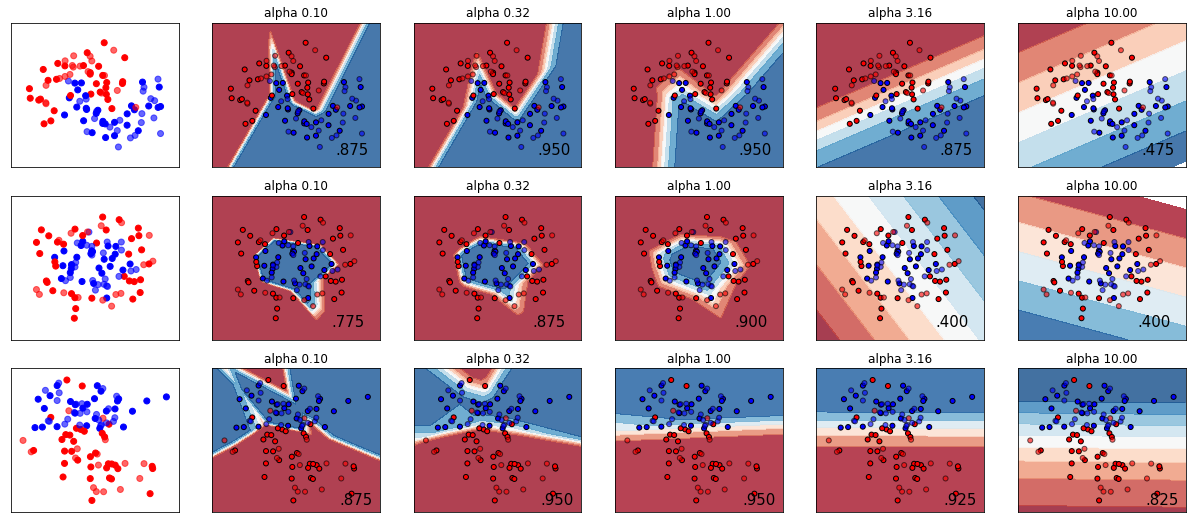

In [15]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline

h = 0.02  # step size in the mesh

alphas = np.logspace(-1, 1, 5)

classifiers = []
names = []
for alpha in alphas:
    classifiers.append(
        make_pipeline(
            StandardScaler(),
            MLPClassifier(
                solver="lbfgs",
                alpha=alpha,
                random_state=1,
                max_iter=2000,
                early_stopping=True,
                hidden_layer_sizes=[10, 10],
            ),
        )
    )
    names.append(f"alpha {alpha:.2f}")

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=0, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

figure = plt.figure(figsize=(17, 9))
i = 1
# iterate over datasets
for X, y in datasets:
    # split into training and test part
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max] x [y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.column_stack([xx.ravel(), yy.ravel()]))
        else:
            Z = clf.predict_proba(np.column_stack([xx.ravel(), yy.ravel()]))[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)

        # Plot also the training points
        ax.scatter(
            X_train[:, 0],
            X_train[:, 1],
            c=y_train,
            cmap=cm_bright,
            edgecolors="black",
            s=25,
        )
        # and testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            alpha=0.6,
            edgecolors="black",
            s=25,
        )

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(
            xx.max() - 0.3,
            yy.min() + 0.3,
            f"{score:.3f}".lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

figure.subplots_adjust(left=0.02, right=0.98)
plt.show()




In [35]:
from BeesAlgo import BeesAlgo
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

models = [
    ('LR', LogisticRegression()),
    ('NB', GaussianNB()),
    ('SVM', SVC()),
    ('KNN', KNeighborsClassifier()),
    ('DT', DecisionTreeClassifier()),
    ('BA',BeesAlgo()),
    ('MLP',MLPClassifier()),
]

In [42]:
from sklearn.model_selection import train_test_split
import numpy as np

for dataset_name, dataset in [('iris',iris), ('breast cancer',breast_cancer), ('wine',wine)]:
    X = np.array(dataset.drop(['label'], axis=1))
    y = np.array(dataset['label'])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    for name, model in models:
        clf = model
        clf.fit(X_train, y_train)
        accuracy = clf.score(X_test, y_test)
        print(dataset_name, name, accuracy)

iris LR 1.0
iris NB 1.0
iris SVM 1.0
iris KNN 1.0
iris DT 1.0


NameError: name 'check_random_state' is not defined

In [39]:
from sklearn.model_selection import train_test_split
import numpy as np
import sklearn.metrics as metrics
from BeesAlgo import BeesAlgo
from sklearn.metrics import accuracy_score
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import euclidean_distances
from numpy import array
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

from numpy import argmax



for dataset_name, dataset in [('iris',iris), ('breast cancer',breast_cancer), ('wine',wine)]:
  #  df_new = df.drop('points', axis=1)
    X = np.array(dataset.drop(['label'], axis=1))
    y = np.array(dataset['label'])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    for name, model in models:
        clf = model
        clf.fit(X_train, y_train)
        accuracy = clf.score(X_test, y_test)
        
        print(dataset_name, name,accuracy)
       


iris LR 1.0
iris NB 1.0
iris SVM 1.0
iris KNN 1.0
iris DT 1.0


NameError: name 'check_random_state' is not defined

In [13]:
from BeesAlgo import BeesAlgo
b = BeesAlgo()
print(b.main())

[((0.9998824257481719, 0.9997806949426232), 3905.9299999611185), ((0.9995691637295729, 0.9991300913047784), 3905.9299998072875), ((0.9999750492267909, 1.0000042755671472), 3905.929999705868), ((0.998861988242806, 0.9976743965737859), 3905.9299984461027), ((0.9987486154616558, 0.9974885160817862), 3905.9299984234667), ((1.0000835593153372, 1.0003099488202734), 3905.9299979531706), ((1.0011512659452828, 1.0022174522437892), 3905.929997928003), ((1.0011021412967283, 1.002302980789097), 3905.929997834982), ((1.0015067188407458, 1.0030261027383198), 3905.929997718993), ((0.9984605388805071, 0.9968728982554086), 3905.9299973745347), ((0.9997596553405693, 0.9997024233167396), 3905.9299965913256), ((1.0017721111566409, 1.0034555335869517), 3905.9299960163635), ((0.9980618873905325, 0.9962261316653247), 3905.9299952715114), ((1.0012694573822358, 1.0027738787367324), 3905.9299929431413), ((1.002886470517373, 1.0056831526586258), 3905.9299907055324), ((0.24444563151993393, -0.021870736345657615),